In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
pd.options.mode.chained_assignment = None 

In [2]:
train = pd.read_csv('D:/personal/Bootcamp/final project/coupon redemption/Coupon_Raw_Data/train_final.csv')

In [4]:
train['category'].unique()

array(['Grocery', 'Pharmaceutical', 'Meat,Packaged Meat',
       'Miscellaneous,Grocery',
       'Packaged Meat,Miscellaneous,Prepared Food,Seafood,Grocery,Meat',
       'Packaged Meat', 'Seafood,Packaged Meat', 'Prepared Food',
       'Bakery',
       'Miscellaneous,Seafood,Grocery,Bakery,Packaged Meat,Meat,Dairy, Juices & Snacks',
       'Natural Products,Packaged Meat,Miscellaneous,Prepared Food,Salads,Seafood,Grocery,Meat',
       'Seafood', 'Natural Products',
       'Flowers & Plants,Vegetables (cut),Natural Products,Travel,Pharmaceutical,Packaged Meat,Miscellaneous,Salads,Prepared Food,Seafood,Bakery,Grocery,Garden,Dairy, Juices & Snacks',
       'Dairy, Juices & Snacks', 'Skin & Hair Care,Pharmaceutical',
       'Pharmaceutical,Grocery',
       'Seafood,Grocery,Packaged Meat,Meat,Dairy, Juices & Snacks',
       'Dairy, Juices & Snacks,Pharmaceutical',
       'Natural Products,Pharmaceutical,Miscellaneous,Prepared Food,Grocery,Packaged Meat,Dairy, Juices & Snacks',
       'Groce

In [3]:
def CategoryTransformer(x):
    if x in ['Dairy', 'Alcohol']:
        x = 'Drink'
    elif x in ['Bakery', 'Packaged Meat', 'Seafood', 'Prepared Food', 'Meat', 'Salads', 'Vegetables (cut)']:
        x = 'Food'
    elif x in ['Flowers & Plants', 'Garden']:
        x = 'Garden'
    elif x in ['Miscellaneous', 'Travel', 'Fuel', 'Restauarant']:
        x = 'Miscellaneous'
    elif x == ' Juices & Snacks':
        x = None
    return x

In [4]:
category_1 = train['category'].str.split(',', expand=True)

for i in range(len(category_1.columns)):
    category_1[i] = category_1[i].map(CategoryTransformer)
    
category_1['combined'] = category_1[category_1.columns[:]].apply(
lambda x: ','.join(x.dropna()), axis=1)

category_1.drop(category_1.iloc[:, :16], axis=1, inplace=True)

column_names = ['Grocery', 'Pharmaceutical', 'Food', 'Drink', 'Miscellaneous','Natural Products', 'Garden', 'Skin & Hair Care']
category_zero = np.zeros(shape=(len(category_1), len(column_names)))
category_2 = pd.DataFrame(category_zero, columns=column_names)
for i in category_1.index:
    x = category_1['combined'][i].split(',')
    for j in x:
        if j == 'Grocery':
            category_2['Grocery'][i] += 1
        elif j == 'Pharmaceutical':
            category_2['Pharmaceutical'][i] += 1
        elif j == 'Food':
            category_2['Food'][i] += 1
        elif j == 'Drink':
            category_2['Drink'][i] += 1
        elif j == 'Miscellaneous':
            category_2['Miscellaneous'][i] += 1
        elif j == 'Natural Products':
            category_2['Natural Products'][i] += 1
        elif j == 'Garden':
            category_2['Garden'][i] += 1
        else:
            category_2['Skin & Hair Care'][i] += 1

In [5]:
train_cat = pd.concat([train, category_2], axis=1, join='inner')

In [6]:
train_cat_1 = pd.concat([train, category_2], axis=1, join='inner')

In [7]:
train_cat.to_csv('D:/personal/Bootcamp/final project/coupon redemption/Coupon_Raw_Data/train_final_category.csv')

In [2]:
train_cat = pd.read_csv('D:/personal/Bootcamp/final project/coupon redemption/Coupon_Raw_Data/train_final_category.csv')

In [55]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age_range          78369 non-null  object 
 1   marital_status     78369 non-null  object 
 2   rented             78369 non-null  object 
 3   family_size        78369 non-null  object 
 4   no_of_children     78369 non-null  object 
 5   income_bracket     78369 non-null  object 
 6   cust_quantity      78369 non-null  int64  
 7   cust_other_usage   78369 non-null  int64  
 8   cust_coupon_usage  78369 non-null  int64  
 9   camp_type          78369 non-null  object 
 10  camp_start_month   78369 non-null  int64  
 11  camp_end_month     78369 non-null  int64  
 12  camp_duration      78369 non-null  int64  
 13  holiday_covered    78369 non-null  object 
 14  item_NO.           78369 non-null  int64  
 15  brand_NO.          78369 non-null  int64  
 16  brand_type         783

In [8]:
train_cat.drop(axis=1, columns='category', inplace=True)

In [3]:
column_names = list(train_cat.columns[19:])
for i in column_names:
    train_cat[i] = train_cat[i].astype(int)

In [4]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         78369 non-null  int64 
 1   age_range          78369 non-null  object
 2   marital_status     78369 non-null  object
 3   rented             78369 non-null  object
 4   family_size        78369 non-null  object
 5   no_of_children     78369 non-null  object
 6   income_bracket     78369 non-null  object
 7   cust_quantity      78369 non-null  int64 
 8   cust_other_usage   78369 non-null  int64 
 9   cust_coupon_usage  78369 non-null  int64 
 10  camp_type          78369 non-null  object
 11  camp_start_month   78369 non-null  int64 
 12  camp_end_month     78369 non-null  int64 
 13  camp_duration      78369 non-null  int64 
 14  holiday_covered    78369 non-null  object
 15  item_NO.           78369 non-null  int64 
 16  brand_NO.          78369 non-null  int64

In [5]:
train_cat.loc[(train_cat['family_size']=='3') & (train_cat['no_of_children']=='1'), 'marital_status'] = 'Married'

In [6]:
train_cat.family_size.unique()

array(['1', '2', 'unknown', '3', '4', '5+'], dtype=object)

In [7]:
train_cat.loc[train_cat['no_of_children']=='3+', 'marital_status'] = 'Married'

In [8]:
train_cat.loc[(train_cat['no_of_children']=='1')&(train_cat['family_size']=='2'), 'marital_status'] = 'Single'
train_cat.loc[(train_cat['no_of_children']=='3')&(train_cat['family_size']=='4'), 'marital_status'] = 'Single'

In [9]:
train_cat.loc[(train_cat['marital_status']=='Single')&(train_cat['family_size']=='2'), 'no_of_children'] = '1'

In [10]:
train_cat.loc[(train_cat['family_size']=='1'), 'marital_status'] = 'Single'
train_cat.loc[(train_cat['age_range'] == '18-25'), 'marital_status'] = 'Single'
train_cat.loc[(train_cat['age_range'] == '18-25'), 'no_of_children'] = '0'

In [11]:
train_cat[(train_cat['income_bracket']>='4') & (train_cat['family_size']=='2')].no_of_children.value_counts()

0          7682
unknown    2917
1          1543
Name: no_of_children, dtype: int64

In [12]:
train_cat[(train_cat['income_bracket']>='4') & (train_cat['family_size']=='2')].marital_status.value_counts()

Married    7272
unknown    2917
Single     1953
Name: marital_status, dtype: int64

In [13]:
train_cat.loc[(train_cat['income_bracket']>='4')&(train_cat['family_size']=='2'), 'no_of_children'] = '0'
train_cat.loc[(train_cat['income_bracket']>='4')&(train_cat['family_size']=='2'), 'marital_status'] = 'Married'

In [14]:
train_cat.loc[train_cat['age_range']=='18-25', 'marital_status'] = 'Single'

In [15]:
train_cat[(train_cat['income_bracket'].between('1','3'))&(train_cat['family_size']=='2')].marital_status.value_counts()

Married    2494
unknown    1353
Single      899
Name: marital_status, dtype: int64

In [16]:
train_cat.loc[(train_cat['income_bracket'].between('1','3'))&(train_cat['family_size']=='2'), 'marital_status'] = 'Married'

In [17]:
train_cat[train_cat['family_size']=='2'].no_of_children.value_counts() 

0          15116
unknown     1353
1            419
Name: no_of_children, dtype: int64

In [18]:
train_cat.loc[train_cat['family_size']=='2', 'no_of_children'] = '0'

In [19]:
train_cat['marital_status'].value_counts()

unknown    35618
Married    27470
Single     15281
Name: marital_status, dtype: int64

In [20]:
train_cat['no_of_children'].value_counts()

unknown    34708
0          31050
1           5249
3+          3858
2           3504
Name: no_of_children, dtype: int64

In [21]:
train_cat['rented'].value_counts()

0          41156
unknown    34708
1           2505
Name: rented, dtype: int64

In [22]:
train_cat['family_size'].value_counts()

unknown    34708
2          16888
1          13612
3           6267
5+          3755
4           3139
Name: family_size, dtype: int64

<AxesSubplot:xlabel='income_bracket', ylabel='Count'>

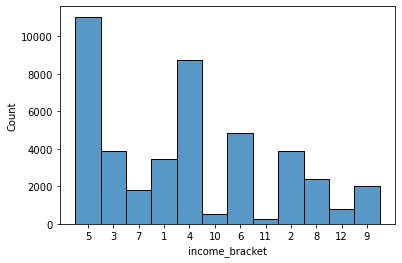

In [110]:
sns.histplot(train_cat[train_cat['income_bracket']!='unknown'].income_bracket)

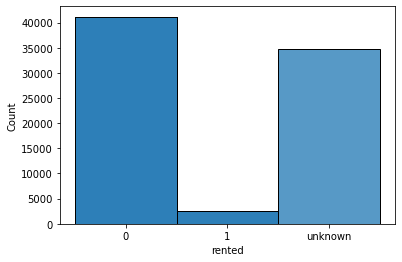

In [112]:
#sns.histplot(train_cat[train_cat['rented']!='unknown'].rented)
sns.histplot(train_cat['rented'])
plt.show()

In [23]:
## Impute rented unknown values as 0
train_cat.loc[train_cat['rented']=='unknown', 'rented'] = '0'

In [24]:
train_cat.head()

,Unnamed: 0,age_range,marital_status,rented,family_size,no_of_children,income_bracket,cust_quantity,cust_other_usage,cust_coupon_usage,...,items_quantity,redemption_status,Grocery,Pharmaceutical,Food,Drink,Miscellaneous,Natural Products,Garden,Skin & Hair Care
0,0,46-55,Single,0,1,0,5,105551,167,1,...,4661,0,1,0,0,0,0,0,0,0
1,1,36-45,Married,0,2,0,3,12143,209,12,...,86,0,1,0,0,0,0,0,0,0
2,2,46-55,Married,0,2,0,7,1351,457,85,...,202,0,0,1,0,0,0,0,0,0
3,3,unknown,unknown,0,unknown,unknown,unknown,306,120,2,...,47,0,1,0,0,0,0,0,0,0
4,4,46-55,Married,0,2,0,3,139063,281,10,...,1610,0,1,0,0,0,0,0,0,0


In [25]:
train_cat['rented'].unique()

array(['0', '1'], dtype=object)

In [26]:
train_cat['family_size'].value_counts()

unknown    34708
2          16888
1          13612
3           6267
5+          3755
4           3139
Name: family_size, dtype: int64

In [27]:
train_cat['no_of_children'].value_counts()

unknown    34708
0          31050
1           5249
3+          3858
2           3504
Name: no_of_children, dtype: int64

In [28]:
train_cat['marital_status'].value_counts()

unknown    35618
Married    27470
Single     15281
Name: marital_status, dtype: int64

In [29]:
train_cat[(train_cat['marital_status']=='unknown') & (train_cat['no_of_children']!='unknown')].family_size.value_counts()

4    910
Name: family_size, dtype: int64

In [30]:
train_cat[(train_cat['marital_status']=='unknown') & (train_cat['no_of_children']!='unknown')].no_of_children.value_counts()

2    910
Name: no_of_children, dtype: int64

In [31]:
train_cat[(train_cat['family_size']=='4')&(train_cat['no_of_children']=='2')].marital_status.value_counts()

Married    1885
unknown     910
Single       87
Name: marital_status, dtype: int64

In [32]:
# Impute Married to replace unknown value 
train_cat.loc[(train_cat['family_size']=='4')&(train_cat['no_of_children']=='2'), 'marital_status'] = 'Married'

In [33]:
train_cat['family_size'].value_counts()

unknown    34708
2          16888
1          13612
3           6267
5+          3755
4           3139
Name: family_size, dtype: int64

In [34]:
train_cat['no_of_children'].value_counts()

unknown    34708
0          31050
1           5249
3+          3858
2           3504
Name: no_of_children, dtype: int64

In [134]:
train_cat['marital_status'].value_counts()

unknown    34708
Married    28467
Single     15194
Name: marital_status, dtype: int64

In [136]:
train_cat['income_bracket'].value_counts()

unknown    34708
5          11037
4           8753
6           4855
2           3892
3           3882
1           3456
8           2369
9           2019
7           1829
12           796
10           513
11           260
Name: income_bracket, dtype: int64

In [137]:
train_cat['rented'].value_counts()

0    75864
1     2505
Name: rented, dtype: int64

In [147]:
train_cat['age_range'].value_counts()

unknown    34708
46-55      15154
36-45      11210
26-35       8024
56-70       3723
70+         3094
18-25       2456
Name: age_range, dtype: int64

## Deal with unknown values from family_size, no_of_children, income_bracket and marital_status features 

#### Bench impute the most frequent value to replace the unknown value

In [35]:
train_fre = train_cat.copy()

In [36]:
train_fre.loc[train_fre['family_size']=='unknown', 'family_size'] = '2'
train_fre.loc[train_fre['no_of_children']=='unknown', 'no_of_children'] = '0'
train_fre.loc[train_fre['marital_status']=='unknown', 'marital_status'] = 'Married'
train_fre.loc[train_fre['income_bracket']=='unknown', 'income_bracket'] = '5'
train_fre.loc[train_fre['age_range']=='unknown', 'age_range'] = '46-55'

## Transform category value to numerical value for age_range, marital_status, rented, no_of_children, income_bracket

In [37]:
train_fre['age_range'].unique()

array(['46-55', '36-45', '18-25', '26-35', '56-70', '70+'], dtype=object)

### Age_range


| Variable | Label |
|----------|-------|
|   18-25  |   0   |
|   26-35  |   1   |
|   36-45  |   2   |
|   46-55  |   3   |
|   56-70  |   4   |
|    70+   |   5   |

In [38]:
def age2num(x):
    if x == '18-25':
        x = int(0)
    elif x == '26-35':
        x = int(1)
    elif x == '36-45':
        x = int(2)
    elif x == '46-55':
        x = int(3)
    elif x == '56-70':
        x = int(4)
    else:
        x = int(5)
    return x

train_fre['age_range'] = train_fre['age_range'].map(age2num)
        

In [39]:
train_fre['no_of_children'].unique()

array(['0', '1', '3+', '2'], dtype=object)

## No_of_children

| Variable | Label |
|----------|-------|
|     0    |   0   |
|     1    |   1   |
|     2    |   2   |
|    3+    |   3   |

In [40]:
def child2num(x):
    if x == '0':
        x = int(0)
    elif x == '1':
        x = int(1)
    elif x == '2':
        x = int(2)
    else:
        x = int(3)
    return x

train_fre['no_of_children'] = train_fre['no_of_children'].map(child2num)

In [41]:
train_fre['marital_status'].unique()

array(['Single', 'Married'], dtype=object)

## Marital_status

| Variable | Label |
|----------|-------|
|   Single |     0 |
|  Married |     1 |

In [42]:
def marital2num(x):
    if x == 'Single':
        x = int(0)
    else:
        x = int(1)
    return x

train_fre['marital_status'] = train_fre['marital_status'].map(marital2num)

In [43]:
train_fre['marital_status'].unique()

array([0, 1], dtype=int64)

In [44]:
train_fre['rented'].unique()

array(['0', '1'], dtype=object)

In [45]:
train_fre['rented'] = train_fre['rented'].astype(int)

In [46]:
train_fre['income_bracket'] = train_fre['income_bracket'].astype(int)

In [47]:
train_fre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         78369 non-null  int64 
 1   age_range          78369 non-null  int64 
 2   marital_status     78369 non-null  int64 
 3   rented             78369 non-null  int32 
 4   family_size        78369 non-null  object
 5   no_of_children     78369 non-null  int64 
 6   income_bracket     78369 non-null  int32 
 7   cust_quantity      78369 non-null  int64 
 8   cust_other_usage   78369 non-null  int64 
 9   cust_coupon_usage  78369 non-null  int64 
 10  camp_type          78369 non-null  object
 11  camp_start_month   78369 non-null  int64 
 12  camp_end_month     78369 non-null  int64 
 13  camp_duration      78369 non-null  int64 
 14  holiday_covered    78369 non-null  object
 15  item_NO.           78369 non-null  int64 
 16  brand_NO.          78369 non-null  int64

In [48]:
train_fre['family_size'].unique()

array(['1', '2', '3', '4', '5+'], dtype=object)

In [49]:
def family2num(x):
    if x == '1':
        x = int(1)
    elif x == '2':
        x = int(2)
    elif x == '3':
        x = int(3)
    elif x == '4':
        x = int(4)
    else:
        x = int(5)
    return x

train_fre['family_size'] = train_fre['family_size'].map(family2num)

In [50]:
train_fre.camp_type.unique()

array(['X', 'Y'], dtype=object)

## Camp_type

| Variable | Label |
|----------|-------|
|     X    |   0   |
|     Y    |   1   |

In [51]:
def camp2num(x):
    if x == 'X':
        x = int(0)
    else:
        x = int(1)
    return x

train_fre['camp_type'] = train_fre['camp_type'].map(camp2num)

In [52]:
train_fre['holiday_covered'].unique()

array(['Yes', 'No'], dtype=object)

## Holiday_covered

| Variable | Label |
|----------|-------|
|    No    |   0   |
|    Yes   |   1   |

In [53]:
train_fre['holiday_covered'] = train_fre['holiday_covered'].map(lambda x: int(1) if x == 'Yes' else int(0))

In [54]:
train_fre['holiday_covered'].unique()

array([1, 0], dtype=int64)

In [55]:
train_fre['brand_type'].unique()

array(['Established', 'Local', 'Local,Established'], dtype=object)

## Brand_type
|      Variable     | Label |
|:-----------------:|:-----:|
|       Local       |   0   |
|    Established    |   1   |
| Local Established |   3   |

In [56]:
def brand2num(x):
    if x == 'Local':
        x = int(0)
    elif x == 'Established':
        x = int(1)
    else:
        x = int(3)
    return x

train_fre['brand_type'] = train_fre['brand_type'].map(brand2num)

In [57]:
train_fre['Grocery'] = train_fre['Grocery'].astype(int)

In [58]:
train_fre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         78369 non-null  int64 
 1   age_range          78369 non-null  int64 
 2   marital_status     78369 non-null  int64 
 3   rented             78369 non-null  int32 
 4   family_size        78369 non-null  int64 
 5   no_of_children     78369 non-null  int64 
 6   income_bracket     78369 non-null  int32 
 7   cust_quantity      78369 non-null  int64 
 8   cust_other_usage   78369 non-null  int64 
 9   cust_coupon_usage  78369 non-null  int64 
 10  camp_type          78369 non-null  int64 
 11  camp_start_month   78369 non-null  int64 
 12  camp_end_month     78369 non-null  int64 
 13  camp_duration      78369 non-null  int64 
 14  holiday_covered    78369 non-null  int64 
 15  item_NO.           78369 non-null  int64 
 16  brand_NO.          78369 non-null  int64

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
features = list(train_fre.columns)
target = 'redemption_status'
features.remove(target)

In [87]:
X = train_fre[features]
y = train_fre[target]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022, stratify=y)

###  Using all the features for XGBClassifier

In [75]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score

In [76]:
xgb = XGBClassifier()

In [95]:
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

In [96]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15528
           1       0.43      0.08      0.14       146

    accuracy                           0.99     15674
   macro avg       0.71      0.54      0.57     15674
weighted avg       0.99      0.99      0.99     15674



In [97]:
print(roc_auc_score(y_test, y_test_pred))

0.5405806920595936


In [98]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62112
           1       0.98      0.51      0.67       583

    accuracy                           1.00     62695
   macro avg       0.99      0.75      0.83     62695
weighted avg       1.00      1.00      0.99     62695



In [99]:
print(roc_auc_score(y_train, y_train_pred))

0.7538190983277704


### Deal with imbalanced data

In [228]:
train_fre['redemption_status'].value_counts()

0    77640
1      729
Name: redemption_status, dtype: int64

In [81]:
train_fre.drop(axis=1, columns='category', inplace=True)

In [82]:
weights = [0.1, 1, 10, 50, 100, 1000]
param_grid = dict(scale_pos_weight = weights)

In [83]:
from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(estimator=xgb, param_grid = param_grid, n_jobs=-1, cv=5, scoring='roc_auc')

In [89]:
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [91]:
xgb_grid.best_score_

0.9293928911222379

In [90]:
xgb_grid.best_params_

{'scale_pos_weight': 1}

In [100]:
y_test_pred = xgb_grid.predict(X_test)

In [101]:
print(roc_auc_score(y_test, y_test_pred))

0.5405806920595936


In [102]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15528
           1       0.43      0.08      0.14       146

    accuracy                           0.99     15674
   macro avg       0.71      0.54      0.57     15674
weighted avg       0.99      0.99      0.99     15674



## Over_Sampling 

In [72]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

In [124]:
X.drop(axis=1, columns='Unnamed: 0', inplace=True)

In [125]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train_s, X_test_s, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=2022)

In [126]:
xgb.fit(X_train_s, y_train)
y_train_pred = xgb.predict(X_train_s)
y_test_pred = xgb.predict(X_test_s)

In [127]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15534
           1       0.99      0.99      0.99     15522

    accuracy                           0.99     31056
   macro avg       0.99      0.99      0.99     31056
weighted avg       0.99      0.99      0.99     31056



In [128]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     62106
           1       0.99      1.00      0.99     62118

    accuracy                           0.99    124224
   macro avg       0.99      0.99      0.99    124224
weighted avg       0.99      0.99      0.99    124224



In [129]:
print(roc_auc_score(y_test,y_test_pred))

0.9901483728672977


In [130]:
print(roc_auc_score(y_train,y_train_pred))

0.9937771140157149


## Selection features 

## ANOVA for numerical features

In [238]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func = f_classif, k ='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [242]:
numerical_features = ['cust_quantity','cust_other_usage', 'cust_coupon_usage', 'items_quantity', 'camp_duration',
                     'camp_start_month', 'camp_end_month']

In [245]:
X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]

Feature 0: 116.917942
Feature 1: 296.362038
Feature 2: 1460.928784
Feature 3: 352.741088
Feature 4: 8.436281
Feature 5: 0.929342
Feature 6: 10.699275


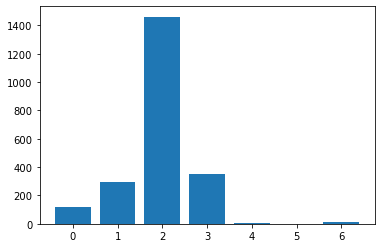

In [246]:
X_train_fs, X_test_fs, fs = select_features(X_train_num, y_train, X_test_num)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [247]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62695 entries, 40661 to 73567
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   cust_quantity      62695 non-null  int64
 1   cust_other_usage   62695 non-null  int64
 2   cust_coupon_usage  62695 non-null  int64
 3   items_quantity     62695 non-null  int64
 4   camp_duration      62695 non-null  int64
 5   camp_start_month   62695 non-null  int64
 6   camp_end_month     62695 non-null  int64
dtypes: int64(7)
memory usage: 3.8 MB


## Selected numerical features: cust_quantity, cust_other_usage, cust_coupon_usage, item_quantity

In [250]:
## Categorical features for Chi2
cat_features = ['age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', 'income_bracket', 'camp_type',
               'holiday_covered', 'brand_type', 'Grocery', 'Pharmaceutical', 'Miscellaneous', 'Food', 'Drink', 
                'Natural Products', 'Garden', 'Skin & Hair Care']
X_train_cat = X_train[cat_features]
X_test_cat = X_test[cat_features]

Feature 0: 7.972519
Feature 1: 9.870759
Feature 2: 1.480327
Feature 3: 15.545695
Feature 4: 45.201387
Feature 5: 3.154700
Feature 6: 52.629926
Feature 7: 8.203711
Feature 8: 258.827612
Feature 9: 91.438327
Feature 10: 42.882223
Feature 11: 94.646266
Feature 12: 83.353528
Feature 13: 39.706006
Feature 14: 78.977490
Feature 15: 0.657125
Feature 16: 0.039258


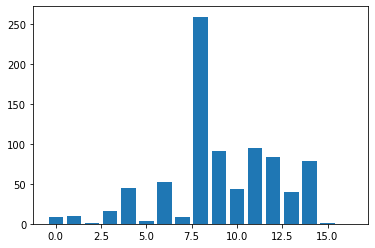

In [251]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_cat, y_train)
X_train_fs = fs.transform(X_train_cat)
X_test_fs = fs.transform(X_test_cat)
X_train_fs, X_test_fs, fs = select_features(X_train_fs, y_train, X_test_fs)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [252]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62695 entries, 40661 to 73567
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age_range         62695 non-null  int64
 1   marital_status    62695 non-null  int64
 2   rented            62695 non-null  int32
 3   family_size       62695 non-null  int64
 4   no_of_children    62695 non-null  int64
 5   income_bracket    62695 non-null  int32
 6   camp_type         62695 non-null  int64
 7   holiday_covered   62695 non-null  int64
 8   brand_type        62695 non-null  int64
 9   Grocery           62695 non-null  int32
 10  Pharmaceutical    62695 non-null  int32
 11  Miscellaneous     62695 non-null  int32
 12  Food              62695 non-null  int32
 13  Drink             62695 non-null  int32
 14  Natural Products  62695 non-null  int32
 15  Garden            62695 non-null  int32
 16  Skin & Hair Care  62695 non-null  int32
dtypes: int32(10), int64(7)
memo

## Seleted categorical features: family_size, no_of_children, camp_type, brand_type, Grocery, Pharmaceutical, Miscellaneous, Food, Drink, Natural Products

In [115]:
features_updated = ['cust_quantity', 'cust_other_usage', 'cust_coupon_usage', 'items_quantity', 'family_size', 
                    'no_of_children', 'camp_type', 'brand_type', 'Grocery', 'Pharmaceutical', 'Miscellaneous', 'Food', 
                    'Drink', 'Natural Products']
X_updated = train_fre[features_updated]

In [257]:
X_train_u, X_test_u, y_train, y_test = train_test_split(X_updated, y, test_size=0.2, random_state=2022, stratify=y)

In [258]:
xgb_grid.fit(X_train_u, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                   

In [259]:
y_test_pred = xgb_grid.predict(X_test_u)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15528
           1       0.39      0.09      0.15       146

    accuracy                           0.99     15674
   macro avg       0.69      0.54      0.57     15674
weighted avg       0.99      0.99      0.99     15674



In [261]:
print(roc_auc_score(y_test, y_test_pred))

0.5438765500059988


## Using SMOTE

In [116]:
smote = SMOTE(random_state=42)
X_res_u, y_res_u = smote.fit_resample(X_updated, y)

X_train_su, X_test_su, y_train, y_test = train_test_split(X_res_u, y_res_u, test_size=0.2, random_state=2022)

In [117]:
xgb.fit(X_train_su, y_train)
y_train_pred = xgb.predict(X_train_su)
y_test_pred = xgb.predict(X_test_su)

In [118]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15534
           1       0.97      0.99      0.98     15522

    accuracy                           0.98     31056
   macro avg       0.98      0.98      0.98     31056
weighted avg       0.98      0.98      0.98     31056



In [119]:
print(roc_auc_score(y_test,y_test_pred))

0.978527455691666


In [120]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     62106
           1       0.97      0.99      0.98     62118

    accuracy                           0.98    124224
   macro avg       0.98      0.98      0.98    124224
weighted avg       0.98      0.98      0.98    124224



In [121]:
print(roc_auc_score(y_train,y_train_pred))

0.982176170210349
